In [1]:
import urllib
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import openapi

In [2]:
import requests

s_key = "PwfNqgN7hal2oSaDMz96GOgjRcDcPrZUybaows5KKV1Xa0uMKVhAbb/e2y78IJMwQ+mHPTsZgjBVqkk54niRUA=="
url = "http://apis.data.go.kr/B551172/Kidney04/kiAlchbyType"
params ={'serviceKey' : s_key, 
         'type' : 'json',  
         'numOfRows' : 100, 
         'centerNm' : '국립암센터', 
         'fromYear' : '2010', 
         'toYear' : '2019' }

all_data = []

# 1️⃣ 먼저 첫 번째 요청을 보내서 totalCount 확인
response = requests.get(url, params=params)

if response.status_code == 200:
    resp_dict = response.json()
    
    # 🔹 totalCount가 없는 경우 대비하여 기본값 0 설정
    total_count = int(resp_dict.get('totalCount', 0))  
    items_per_page = params['numOfRows']  
    total_pages = (total_count // items_per_page) + (1 if total_count % items_per_page else 0)

    print(f"📌 총 데이터 개수: {total_count}, 가져올 페이지 수: {total_pages}")

    # 2️⃣ total_pages 만큼 반복하여 모든 데이터를 가져오기
    for i in range(1, total_pages + 1):
        params['pageNo'] = i  
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            resp_dict = response.json()
            items = resp_dict.get('items', [])  # 🔹 데이터가 없을 경우 빈 리스트 반환
            all_data.extend(items)
        else:
            print(f"❌ 데이터 요청 실패 (페이지 {i})")

    print(f"✅ 총 {len(all_data)}개의 데이터 수집 완료!")

else:
    print("❌ API 요청 실패")

📌 총 데이터 개수: 608, 가져올 페이지 수: 7
✅ 총 608개의 데이터 수집 완료!


In [3]:
df_drunk = pd.DataFrame(all_data)
df_drunk

,statsMetaNo,centerNm,critYr,ptAge,ptSexCd,statsTrgtNm,ncsNmvl,wholNcsDnmvl,ptCntNmvl,wholPtCntDnmvl
0,16040,국립암센터,2014,56,F,Y,1,1,1,1
1,16040,국립암센터,2014,27,F,N,1,1,1,1
2,16040,국립암센터,2018,67,M,Y,1,1,1,1
3,16040,국립암센터,2014,44,M,Y,1,1,1,1
4,16040,국립암센터,2014,55,M,Y,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
603,16040,국립암센터,2013,71,M,N,1,2,1,2
604,16040,국립암센터,2019,49,M,N,1,3,1,3
605,16040,국립암센터,2011,71,M,N,1,2,1,2
606,16040,국립암센터,2018,79,F,N,1,1,1,1


In [4]:
df_drunk = df_drunk.iloc[:, [1,2,3,4,5,-2]]
df_drunk

,centerNm,critYr,ptAge,ptSexCd,statsTrgtNm,ptCntNmvl
0,국립암센터,2014,56,F,Y,1
1,국립암센터,2014,27,F,N,1
2,국립암센터,2018,67,M,Y,1
3,국립암센터,2014,44,M,Y,1
4,국립암센터,2014,55,M,Y,1
...,...,...,...,...,...,...
603,국립암센터,2013,71,M,N,1
604,국립암센터,2019,49,M,N,1
605,국립암센터,2011,71,M,N,1
606,국립암센터,2018,79,F,N,1


In [5]:
df_drunk.rename(columns={'statsTrgtNm' : '음주 여부'}, inplace=True)
df_drunk

C:\Users\human\AppData\Local\Temp\ipykernel_11420\1193351378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drunk.rename(columns={'statsTrgtNm' : '음주 여부'}, inplace=True)


,centerNm,critYr,ptAge,ptSexCd,음주 여부,ptCntNmvl
0,국립암센터,2014,56,F,Y,1
1,국립암센터,2014,27,F,N,1
2,국립암센터,2018,67,M,Y,1
3,국립암센터,2014,44,M,Y,1
4,국립암센터,2014,55,M,Y,1
...,...,...,...,...,...,...
603,국립암센터,2013,71,M,N,1
604,국립암센터,2019,49,M,N,1
605,국립암센터,2011,71,M,N,1
606,국립암센터,2018,79,F,N,1


In [8]:
df_drunk.rename(columns={'centerNm':'센터 이름', 'critYr':'기준 년도', 'ptAge':'연령' ,'ptSexCd':'성별', 'ptCntNmvl': '환자수'}, inplace=True)
df_drunk

C:\Users\human\AppData\Local\Temp\ipykernel_11420\1917862403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drunk.rename(columns={'centerNm':'센터 이름', 'critYr':'기준 년도', 'ptAge':'연령' ,'ptSexCd':'성별', 'ptCntNmvl': '환자수'}, inplace=True)


,센터 이름,기준 년도,연령,성별,음주 여부,환자수
0,국립암센터,2014,56,F,Y,1
1,국립암센터,2014,27,F,N,1
2,국립암센터,2018,67,M,Y,1
3,국립암센터,2014,44,M,Y,1
4,국립암센터,2014,55,M,Y,1
...,...,...,...,...,...,...
603,국립암센터,2013,71,M,N,1
604,국립암센터,2019,49,M,N,1
605,국립암센터,2011,71,M,N,1
606,국립암센터,2018,79,F,N,1


In [9]:
df_drunk['환자수'] = pd.to_numeric(df_drunk['환자수'], errors='coerce')

df_drunk['환자수'] = df_drunk['환자수'].fillna(0).astype(int)

drunk_count = df_drunk.groupby(df_drunk['음주 여부'].fillna('무응답'))['환자수'].sum()

print(drunk_count)

음주 여부
       4
N    394
Y    403
Name: 환자수, dtype: int64


C:\Users\human\AppData\Local\Temp\ipykernel_11420\2151160347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drunk['환자수'] = pd.to_numeric(df_drunk['환자수'], errors='coerce')
C:\Users\human\AppData\Local\Temp\ipykernel_11420\2151160347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drunk['환자수'] = df_drunk['환자수'].fillna(0).astype(int)


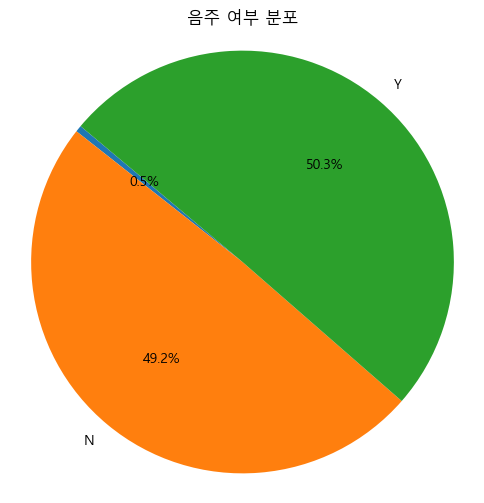

In [10]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(drunk_count.values, labels=drunk_count.index, autopct='%1.1f%%', startangle=140)
plt.title('음주 여부 분포')
plt.axis('equal')
plt.show()